### Done when data is not missing at random

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer    
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('titanic_toy.csv')

In [5]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [7]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 2)

In [9]:
x_train['Age_99'] =x_train['Age'].fillna(99)
x_train['Age_minus1'] =x_train['Age'].fillna(-1)

x_train['Fare_999'] =x_train['Fare'].fillna(999)
x_train['Fare_minus1'] =x_train['Fare'].fillna(-1)

In [10]:
print('Original Age variance:', x_train['Age'].var())
print('Median Imputation age',x_train['Age_99'].var() )
print('Mean Age imputation',x_train['Age_minus1'].var())

print('Original Fare variable varicance', x_train['Fare'].var())
print('median Fare imputation', x_train['Fare_999'].var())
print('Mean fare imputation', x_train['Fare_minus1'].var())

Original Age variance: 204.34951339046142
Median Imputation age 951.7275570187188
Mean Age imputation 318.0896202624488
Original Fare variable varicance 2448.1979137063163
median Fare imputation 47219.202652176304
Mean fare imputation 2378.5676784883494


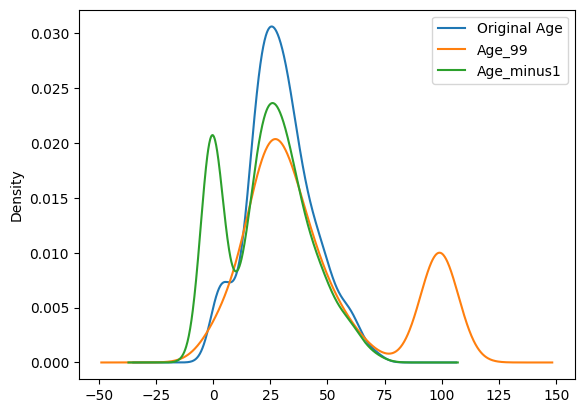

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
x_train['Age'].plot(kind='kde', ax=ax)
x_train['Age_99'].plot(kind='kde', ax=ax)   
x_train['Age_minus1'].plot(kind='kde', ax=ax)
plt.legend(['Original Age', 'Age_99', 'Age_minus1'])
plt.show()

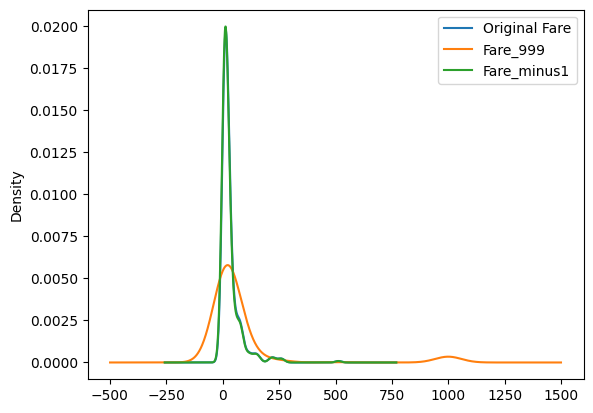

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)   
x_train['Fare'].plot(kind='kde', ax=ax)
x_train['Fare_999'].plot(kind='kde', ax=ax)
x_train['Fare_minus1'].plot(kind='kde', ax=ax)
plt.legend(['Original Fare', 'Fare_999', 'Fare_minus1'])
plt.show()

In [13]:
x_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


### Using Sklearn

In [14]:
x_train,x_test,y_train,y_test  = train_test_split(x,y, test_size=0.2, random_state= 2)

In [15]:
imputer1 = SimpleImputer(strategy='constant', fill_value=99)
imputer2 = SimpleImputer(strategy='constant', fill_value=999)

In [16]:
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare']),
],remainder='passthrough')

In [17]:
trf.fit(x_train)

,transformers,"[('imputer1', ...), ('imputer2', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'constant'
,fill_value,99


In [18]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [19]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [21]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [22]:
x_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]], shape=(712, 3))